# Class 2 Python 进阶

# 2.1 List/Dictionary Comprehension 列表字典解析

## 2.1.1 列表解析

列表解析式是将一个列表（实际上适用于任何可迭代对象（iterable））转换成另一个列表的工具。在转换过程中，可以指定元素必须符合一定的条件，才能添加至新的列表中，这样每个元素都可以按需要进行转换。

可以理解为一个简化形式的for 循环

基本格式：

[表达式0 for var in 可遍历的变量 if 表达式2]

所有的列表解析都能通过标准的for if 来完成，主要功能是缩短代码和弱化底层的逻辑结构

### 例0 构造一个list，里面包含0-9的平方

In [10]:
# 构造一个list，0-19的平方
powerlist = []
for i in range(10):
    powerlist.append(i ** 2)
powerlist

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [12]:
# 构造一个list，0-19的平方
powerlist = [i ** 2 for i in range(10)]
powerlist

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### 例1. add "Hello, " before the string
Input: ['Python2.7', 'Cpython', 'Python3.4', 'Perl5.0', 'Lua', 'Python3.6', 'Powershell']

#### 普通for 循环

In [13]:
inputstrings =  ['Python2.7', 'Cpython', 'Python3.4', 'Perbl5.0', 'Lua', 'Python3.6', 'Powershell']
outputstrings = []
for item in inputstrings:
    moditem  = "Hello, " + item # 在每个元素前面加 'Hello'
    outputstrings.append(moditem) # 加入要生成的list
outputstrings

['Hello, Python2.7',
 'Hello, Cpython',
 'Hello, Python3.4',
 'Hello, Perbl5.0',
 'Hello, Lua',
 'Hello, Python3.6',
 'Hello, Powershell']

#### 列表解析

In [14]:
inputstrings =  ['Python2.7', 'Cpython', 'Python3.4', 'Perbl5.0', 'Lua', 'Python3.6', 'Powershell']
outputstrings = ["Hello, " + item for item in inputstrings]
outputstrings

['Hello, Python2.7',
 'Hello, Cpython',
 'Hello, Python3.4',
 'Hello, Perbl5.0',
 'Hello, Lua',
 'Hello, Python3.6',
 'Hello, Powershell']

#### 在列表解析中加入if
only keep python related and add "Hello, " before the string

In [15]:
inputstrings =  ['Python2.7', 'Cpython', 'Python3.4', 'Perbl5.0', 'Lua', 'Python3.6', 'Powershell']
outputstrings = ["Hello, " + item for item in inputstrings if 'python' in item.lower()]
outputstrings

['Hello, Python2.7', 'Hello, Cpython', 'Hello, Python3.4', 'Hello, Python3.6']

### 例2. 求0-99的所有被7整除的数，并且求它们的平方和

#### for and if

In [16]:
n = 100
sqs = []
for i in range(n):
    if i % 7 == 0:
        sqs.append(i ** 2)
result = sum(sqs)
result

49735

#### 列表解析

In [17]:
n = 100
result = sum([i ** 2 for i in range(n) if i % 7 ==0]) # for if inline with reasonable clear logic
result

49735

In [18]:
def nseven1(n):
    sqs = []
    for i in range(n):
        if i % 7 == 0:
            sqs.append(i ** 2)
    result = sum(sqs)
    return result

def nseven2(n):
    result = sum([i ** 2 for i in range(n) if i % 7 ==0]) # for if inline with reasonable clear logic
    result

#### 速度比较
快一些，不质变

In [19]:
%timeit nseven1(10000)

The slowest run took 15.03 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 1.16 ms per loop


In [20]:
%timeit nseven2(10000)

1000 loops, best of 3: 976 µs per loop


### 例3. 解除list 嵌套
Input: [[1,2], [3,4], [6,7], [10,101]]

Output: [1,2,3,4,6,7,10,101]

In [21]:
nestedlist =  [[1,2], [3,4], [6,7], [10,101]]
unnestedlist = [item for sublist in nestedlist for item in sublist]
unnestedlist

[1, 2, 3, 4, 6, 7, 10, 101]

## 2.1.2 字典解析

### 字典解析和列表解析基本一样，表达式要同时表述key和value

{表达式0:表达式1 for var in 可遍历的变量 if 表达式2}

### 例1. 把列表的key全部变成大写
continentdict = {'China': 'AS', 'Korea': 'AS', 'Canada': 'NA', 'France': 'EU', 'BRAZIL': 'SA', 'Russia': 'EU'}

In [22]:
continentdict = {'China': 'AS', 'Korea': 'AS', 'Canada': 'NA', 'France': 'EU', 'BRAZIL': 'SA', 'Russia': 'EU'}

In [23]:
continentdictallcap = {key.upper():continentdict[key] for key in continentdict}
continentdictallcap

{'BRAZIL': 'SA',
 'CANADA': 'NA',
 'CHINA': 'AS',
 'FRANCE': 'EU',
 'KOREA': 'AS',
 'RUSSIA': 'EU'}

# 2.2. 文件IO

文件是存储在硬盘上的，python提供了读写文件的功能. 
#### readonly, default
f = open(filepath, 'r')
f = open(filepath)
#### write only
f = open(filepath, 'w')

## 2.2.1 读文件

In [25]:
file1 = open('fileio1.txt', 'r') # this file is under the same directory, otherwise, please use full path
# file1 = open(r'C:\scriptwb\python course\2\fileio1.txt')
print 'Object file1: ', file1, '\n' # file handler object

print file1.read()
file1.close()

Object file1:  <open file 'fileio1.txt', mode 'r' at 0x000000000610D8A0> 

You're getting ready to start a new company. What language should you choose to build it?
Or to phrase the same question a different way: You are looking for a job, which language should you learn?
You might guess from the title of this post that I think the right answer is Python. But why?
The answer is that Python is powerful. But what does that mean, exactly? What makes for power in a programming language?


In [26]:
file1 = open('fileio1.txt', 'r') # this file is under the same directory, otherwise, please use full path
for (linenumber, linecontent) in enumerate(file1):
    print '[%d] %s' %(linenumber, linecontent.strip())
file1.close()

[0] You're getting ready to start a new company. What language should you choose to build it?
[1] Or to phrase the same question a different way: You are looking for a job, which language should you learn?
[2] You might guess from the title of this post that I think the right answer is Python. But why?
[3] The answer is that Python is powerful. But what does that mean, exactly? What makes for power in a programming language?


#### 当完成读阶段或者写阶段时务必close文件
#### 建议使用with语句，自动完成close文件

In [27]:
with open('fileio1.txt', 'r') as file1:
    for (linenumber, linecontent) in enumerate(file1):
        print '[%d] %s' %(linenumber, linecontent.strip())

[0] You're getting ready to start a new company. What language should you choose to build it?
[1] Or to phrase the same question a different way: You are looking for a job, which language should you learn?
[2] You might guess from the title of this post that I think the right answer is Python. But why?
[3] The answer is that Python is powerful. But what does that mean, exactly? What makes for power in a programming language?


## 2.2.2 写文件

In [56]:
continentdict = {'China': 'AS', 'Korea': 'AS', 'Canada': 'NA', 'France': 'EU', 'BRAZIL': 'SA', 'Russia': 'EU'}

如果需要把这个字典写入文件

filehandler.write(string)

In [28]:
with open('continentdict.txt', 'w') as g:
    g.write(str(continentdict))
# readout and print this file
with open('continentdict.txt', 'r') as f:
    print f.read()

{'Canada': 'NA', 'BRAZIL': 'SA', 'Korea': 'AS', 'France': 'EU', 'China': 'AS', 'Russia': 'EU'}


如果我们想写成一个csv表格，表头

Country,Continent

Canada,NA

Brazil,SA

...,...

In [29]:
with open('continentdict.csv', 'w') as g:
    g.write('Country,Continent\n')
    for country in continentdict:
        g.write('%s,%s\n'%(country, continentdict[country]))
# readout and print this file
with open('continentdict.csv', 'r') as f:
    print f.read()        

Country,Continent
Canada,NA
BRAZIL,SA
Korea,AS
France,EU
China,AS
Russia,EU



#### 不像table? csv是一种通用的表格存储形式，任何数据分析软件的基本能读格式。本质是纯文本文件，逗号作为列分割，回车作为行分割

我们可以用excel打开试试

我们也可以用python pandas包打开看看 【数据分析的基本扩展包之一】

In [30]:
import pandas
df = pandas.read_csv('continentdict.csv', keep_default_na=False)
df

,Country,Continent
0,Canada,NA
1,BRAZIL,SA
2,Korea,AS
3,France,EU
4,China,AS
5,Russia,EU


# 2.3. 与操作系统OS的交互

## 2.3.1 文件与文件夹

这里仅仅举例说明常见的需求，有更进一步的学习需求请查阅
https://docs.python.org/2/library/os.html

In [31]:
# os的基本操作在os包里，基本的python包，无需任何扩展安装
import os

### 目录操作

#### 当前目录

In [32]:
cwd1 = os.getcwd()
print cwd1
# we store current working directory in cwd1, later we change working directory and use it to change it back

C:\scriptwb\2


In [33]:
os.listdir(cwd1)

['.ipynb_checkpoints',
 'Class1 Appendix.ipynb',
 'Class2.ipynb',
 'continentdict.csv',
 'continentdict.txt',
 'essay.txt',
 'factorial.ipynb',
 'factorial.py',
 'factorial.pyc',
 'factorial10.py',
 'fileio1.txt',
 'Homework2.ipynb',
 'revnuetable.csv',
 'sumxy.py']

#### 查询上一层dir

In [34]:
parentwd = os.path.dirname(cwd1)
parentwd

'C:\\scriptwb'

#### 返回上一层，再返回来

In [35]:
os.chdir(parentwd) # changed to upper level

In [36]:
os.getcwd()

'C:\\scriptwb'

In [37]:
os.chdir(cwd1) # changed back
os.getcwd()

'C:\\scriptwb\\2'

### 文件查询与操作

#### 文件 信息

In [38]:
os.path.isfile('continentdict.csv')

True

In [39]:
os.path.isfile('continentdict.tsv')

False

In [40]:
filename = 'continentdict.csv'
print '%s is created at %s, last modified at %s, full path is %s' %(
    filename, os.path.getctime(filename), os.path.getmtime(filename), os.path.abspath(filename))

continentdict.csv is created at 1510108311.7, last modified at 1510128776.89, full path is C:\scriptwb\2\continentdict.csv


看起来时间是一种特殊格式，人没法阅读。怎么处理？

Let us google "os.path.filectime convert"

第一个结果是stackoverflow的

https://stackoverflow.com/questions/19501711/how-can-i-convert-os-path-getctime

In [41]:
from datetime import datetime
datetime.fromtimestamp(1382189138.4196026).strftime('%Y-%m-%d %H:%M:%S')

'2013-10-19 06:25:38'

基于这个回答，我们可以写一个转化函数，从机器能理解的浮点秒数，转化成人能读懂得日期时间

In [42]:
def converttimestamp(timestamp):
    return datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')

现在能够正常显示了

In [43]:
filename = 'continentdict.csv'
print '%s is created at %s, last modified at %s, full path is %s' %(
    filename, converttimestamp(os.path.getctime(filename)), 
    converttimestamp(os.path.getmtime(filename)), os.path.abspath(filename))

continentdict.csv is created at 2017-11-07 18:31:51, last modified at 2017-11-08 00:12:56, full path is C:\scriptwb\2\continentdict.csv


#### 拷贝与删除文件

Google python copy file

We can find this page
https://docs.python.org/2/library/shutil.html

google python delete file

We can find this page
https://stackoverflow.com/questions/6996603/how-to-delete-a-file-or-folder 

In [44]:
import shutil
shutil.copyfile('continentdict.csv', 'continentdict_copy.csv')

In [45]:
file2remove = 'continentdict_copy.csv'
print os.path.isfile(file2remove)
os.remove(file2remove)
print os.path.isfile(file2remove)

True
False


## 2.3.2 OS命令行

### 从命令行传递参数，运行python代码

命令行基础

python code1.py arg1 arg2 arg3 ...

python - 操作系统命令

code1.py - 操作系统命令 参数0 要运行的代码

arg1 代码命令行参数0

arg2 代码命令行参数1

...

####基础模块sys

sys.argv是一个list，从操作系统获得[arg0, arg1, arg2...]， arg0通常是python代码名， arg1, arg2...一般是要传给python代码的参数

#### 进阶模块 argparse
https://docs.python.org/2.7/library/argparse.html

#### sumxy from command line
命令行demo

建立一个sumxy.py文件

输入一下内容

打开命令行，输入python sumxy 1 2

在jupyter中， ! 开头表示这一行是命令行操作

mac 请用ls

In [47]:
! dir
! type sumxy.py
! python sumxy.py 1 2

 Volume in drive C is Windows
 Volume Serial Number is EC3A-B103

 Directory of C:\scriptwb\2

11/08/2017  01:27 AM    <DIR>          .
11/08/2017  01:27 AM    <DIR>          ..
11/07/2017  10:40 PM    <DIR>          .ipynb_checkpoints
11/08/2017  12:23 AM             3,205 Class1 Appendix.ipynb
11/08/2017  01:27 AM            35,573 Class2.ipynb
11/08/2017  01:12 AM                83 continentdict.csv
11/08/2017  01:10 AM                94 continentdict.txt
11/07/2017  11:52 PM             6,081 essay.txt
11/08/2017  12:36 AM             1,410 factorial.ipynb
11/08/2017  12:39 AM               391 factorial.py
11/08/2017  12:40 AM               520 factorial.pyc
11/08/2017  12:41 AM                47 factorial10.py
11/06/2017  09:59 PM               412 fileio1.txt
11/07/2017  11:53 PM             1,635 Homework2.ipynb
11/07/2017  10:53 PM               164 revnuetable.csv
11/06/2017  09:59 PM               176 sumxy.py
              13 File(s)         49,791 bytes
               3 Di

### 从python运行命令行
基础

os.system(cmd)

os.popen(cmd)

进阶

subprocess module

https://docs.python.org/2/library/subprocess.html

In [102]:
import os
cmdoutput = os.popen('python sumxy.py 1 2').read()
print cmdoutput

3.0



#### 为什么用python运行命令行
一个项目的各个部分可能是很多人用不同的语言写的，需要整合在一起. python可以作为胶水语言，写project高层的manamge code，调用python和其他语言写的代码来执行任务。

<font size="5" color="red">以下的内容掌握需要较长时间的理解和磨练。往往Python开发工程师也并不需要完全精通这些高级功能。
作为一门基础课，有必要给大家科普这些内容。在这里大家的学习目标是了解概念功能，能大概看懂最基础的代码，不必苛求理解细节。
</font>
<font size="5" color="Blue">
很多功能你不懂细节，记不住代码长什么样，但是并不妨碍你使用它</font>

# 2.4 字符串进阶

## 2.4.1 正则表达式

#### 正则表达式是一套通用的文本检索提取规则，各种编程语言都有正则表达式的模块。学习正则表达式需要大概2-3小时的学习达到运用程度，精通则需要较长时间的练习。

正则表达式，又称正规表示式、正規表示法、正規運算式、規則運算式、常規表示法（英语：Regular Expression，在代码中常简写为regex、regexp或RE），是计算机科学的一个概念。正则表达式使用单个字符串来描述、匹配一系列符合某个句法规则的字符串。在很多文本编辑器裡，正則表达式通常被用来检索、替换那些符合某个模式的文本。

cheatsheet
https://www.debuggex.com/cheatsheet/regex/python

Pattern怎么写是个不小的问题，这里不要求大家掌握，参考cheatsheet和google

In [105]:
import re
pattern = '[a-z][0-5]+'
res = re.match(pattern, 'c660')
if res:
    print res.group()
else:
    print 'not matching'

not matching


#### 表头变换
metrics是一个数据表的表头，我们这里把它放入了一个list。每个column名看起来每一个代表某组测量数据，ID0和ID1表示组号，去掉组号其他字符表示这个数据的名称。我们希望变换

In [106]:
metrics = ['LENGTH_ID0_FINAL', 'LENGTH_ID1_FINAL', 'WIDTH_ID0', 'WIDTH_ID1', 'ID2_WEIGHT', 'ID3_WEIGHT']

变换成两个list 作为双杭表头

列表1：数据的名称

['LENGTH_FINAL', 'LENGTH_FINAL', 'WIDTH', 'WIDTH', 'WEIGHT', 'WEIGHT']

列表2：组号

['ID0', 'ID1', 'ID0', 'ID1', 'ID2', 'ID3']

因为不同的数据会有略微不同的格式，有的组号放在了左边，有的放在了中间，有的写在了最右边，所以简单的.split('_')操作并不好用

In [107]:
import re

In [108]:
pattern = '(.*)(ID\d)(.*)'
matchresult = re.match(pattern, 'WIDTH_ID1')

In [109]:
matchresult.groups()

('WIDTH_', 'ID1', '')

In [110]:
results = [re.match(pattern, metric).groups() for metric in metrics]
print results
IDs = [result[1] for result in results]
measurements = [(result[0].strip('_') + '_' + result[2].strip('_')).strip('_') for result in results]
print 'measurement:',measurements
print 'ID:',IDs

[('LENGTH_', 'ID0', '_FINAL'), ('LENGTH_', 'ID1', '_FINAL'), ('WIDTH_', 'ID0', ''), ('WIDTH_', 'ID1', ''), ('', 'ID2', '_WEIGHT'), ('', 'ID3', '_WEIGHT')]
measurement: ['LENGTH_FINAL', 'LENGTH_FINAL', 'WIDTH', 'WIDTH', 'WEIGHT', 'WEIGHT']
ID: ['ID0', 'ID1', 'ID0', 'ID1', 'ID2', 'ID3']


#### Email地址的验证

google search

regular expression match an email address

I found a page http://emailregex.com/

In [111]:
emailpattern = r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)"
emails = ['john@hotmail.com', 'tom3@gmail.com', '32111198@qq.com', 't%wan@163.com', 'slayer@99cn']
validemails = [email for email in emails if re.match(emailpattern, email)]
validemails

['john@hotmail.com', 'tom3@gmail.com', '32111198@qq.com']

#### 电话号码的验证
https://stackoverflow.com/questions/16699007/regular-expression-to-match-standard-10-digit-phone-number 

general format
^(\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]\d{3}[\s.-]\d{4}$
Matches the following

123-456-7890
(123) 456-7890
123 456 7890
123.456.7890
+91 (123) 456-7890
If you do not want a match on non-US numbers use

^(\+0?1\s)?\(?\d{3}\)?[\s.-]\d{3}[\s.-]\d{4}$

# 2.5 面向对象编程 Object Oriented Programming

## 2.5.1 面向对象技术简介
类(Class): 用来描述具有相同的属性和方法的对象的集合。它定义了该集合中每个对象所共有的属性和方法。对象是类的实例。

对象：通过类定义的数据结构实例。对象包括两个数据成员（类变量和实例变量）和方法。

实例化：创建一个类的实例，类的具体对象。

方法：类中定义的函数。

继承：进一步细化具体化的，类之间的关系。狗继承于哺乳动物，哺乳动物继承与脊椎动物

#### 面向对象编程是一个非常大也是非常重要的学习项目。什么时候需要定义类，构建怎样的类，很多时候需要对项目架构设计有较多的经验，并不只是python语言的问题。这里的目标是让同学对类有基本的理解，能够看懂代码。

全面但又很初步的了解python的面向对象编程，学习资料

http://yangcongchufang.com/%E9%AB%98%E7%BA%A7python%E7%BC%96%E7%A8%8B%E5%9F%BA%E7%A1%80/python-object-class.html 

#### 简单的例子

In [112]:
class Student(object): # 继承自object python基础类
    """空类Student"""
    pass # 空类

#### 实体化并添加数据

In [113]:
Ming = Student()
print Ming # instance, MIng is an object 对象
print Ming.__class__ # Ming.__class__ refer to class

<class '__main__.Student'>


#### 自由添加对象数据

In [114]:
Ming.name = 'Ming Li'
Ming.score = 98
print dir(Ming)
print Ming.__doc__
print Ming.__module__
print Ming.name, Ming.score

['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'name', 'score']
空类Student
__main__
Ming Li 98


#### 方法与数据封装

In [115]:
class Student(object):
    """Student的类"""
    
    def __init__(self, name, score): # __init__ method，初始化方法，命名不随意
        self.name = name
        self.score = score
        
    def print_score(self):
        print("%s: %s" % (self.name, self.score))

In [116]:
Ming = Student('Ming Li', 98)
print dir(Ming)
print Ming.__module__
Ming.print_score()
print Ming.name, Ming.score # 外部也可以访问

['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'name', 'print_score', 'score']
__main__
Ming Li: 98
Ming Li 98


#### 用__表示私有封装，只能内部方法访问

In [117]:
class Student(object):
    """Student的类"""
    
    def __init__(self, name, score): # __init__ method，初始化方法，命名不随意
        self.__name = name
        self.__score = score
        
    def print_score(self):
        print("%s: %s" % (self.__name, self.__score))
        
Ming.print_score()
print Ming.__name, Ming.__score # 外部无法访问

Ming Li: 98


AttributeError: 'Student' object has no attribute '__name'

#### 类变量和实例变量
类变量，在方法之外，全类和所有对象共有，慎用

实例变量，只有实例有

In [118]:
class Student(object):
    """Student的类"""
    studentcount = 0
    def __init__(self, name, score): # __init__ method，初始化方法，命名不随意
        self.name = name
        self.score = score
        Student.studentcount += 1
        
    def print_score(self):
        print("%s: %s" % (self.name, self.score))

Ming = Student('Ming Li', 98)
Ding = Student('Ding Zhang', 91)
print Ming.studentcount
print Ding.studentcount
print Ming.score
print Student.studentcount #类变量为对象和类共有 
print Student.score # 不存在

2
2
98
2


AttributeError: type object 'Student' has no attribute 'score'

#### 继承与方法重载

In [119]:
class PhDStudent(Student):
    """PhDStudent, inherent from Student"""
    def __init__(self, name, score, hindex): # __init__ method，初始化方法，命名不随意
        self.name = name
        self.score = score
        self.hindex = hindex
        Student.studentcount += 1
    def print_score(self):
        print("%s: %s, %s" % (self.name, self.score, self.hindex))

Lei = PhDStudent('Lei Xu', 100, 23)
print Student.studentcount # 子类也会计入父类的count
Lei.print_score()

3
Lei Xu: 100, 23


# 2.6 Python Library的使用

#### 他山之石 可以攻玉。当你要编程实现一个功能的时候，第一应该想到的是google或者baidu已有的Module，而不是自己Start From Scratch. 

Anaconda包含了很多Module，大部分数据清理，建模，可视化，机器学习等功能都可以用已经包含在安装包里的模块

numpy/scipy - 让你的python能和R或者Matlab一样有数组，矩阵以及各种特殊函数

pandas - 表格dataframe

sklearn - 大部分统计模型statistical learning

pytorch, tensorflow - deep learning

opencv2, skimage - 计算机视觉

<IPython.core.display.Javascript object>


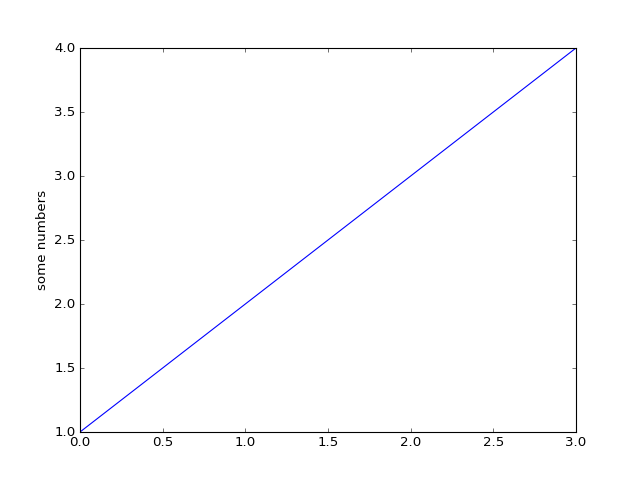

In [120]:
import matplotlib.pyplot as plt # import绘图包
# interactive in notebook
%matplotlib notebook 
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

#### 需要的功能Anaconda没有包括，let us google and install

In [121]:
!pip install wordcloud

<IPython.core.display.Javascript object>


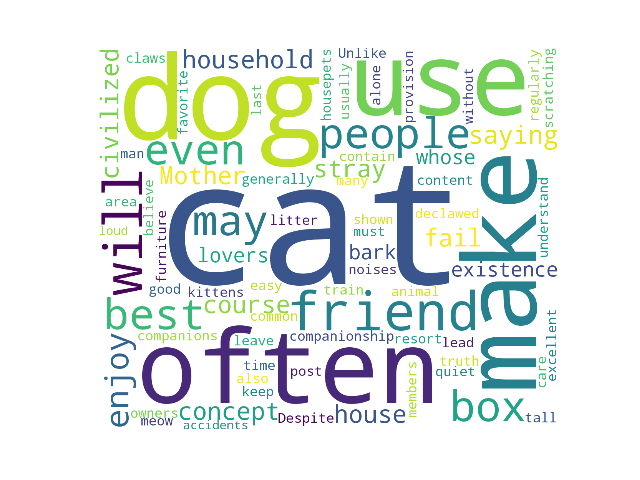

In [122]:
word_string = """
A dog is man's best friend." That common saying may contain some truth, but dogs are not the only animal friend whose companionship people enjoy. For many people, a cat is their best friend. Despite what dog lovers may believe, cats make excellent housepets as they are good companions, they are civilized members of the household, and they are easy to care for
Unlike dogs, cats do not bark or make other loud noises. Most cats don't even meow very often. They generally lead a quiet existence. Cats also don't often have "accidents." Mother cats train their kittens to use the litter box, and most cats will use it without fail from that time on. Even stray cats usually understand the concept when shown the box and will use it regularly. Cats do have claws, and owners must make provision for this. A tall scratching post in a favorite cat area of the house will often keep the cat content to leave the furniture alone. As a last resort, of course, cats can be declawed.
"""
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Convert all the required text into a single string here 
#and store them in word_string

#you can specify fonts, stopwords, background color and other options

wordcloud = WordCloud( stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(word_string)

plt.figure(2)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 2.7 函数式编程

### lambda 函数简写

In [123]:
func1 = lambda x : x % 2
### 等效于
def func2(x):
    return x % 2

In [126]:
func1(10)

0

### 基本函数：map()、reduce()、filter()

#### map(func, iterator)

map()实现的功能很简单，就是将第二个参数（iterable）中的每一个元素分别传给第一个参数（func），依次执行函数得到结果，并将结果组成一个新的list对象后进行返回。返回结果永远都是一个list。

在传入多个可迭代对象的情况下，map()会依次从所有可迭代对象中依次取一个元素，组成一个元组列表，然后将元组依次传给func；若可迭代对象的长度不一致，则会以None进行补上。

In [127]:
def addhellotoleft(inputstring):
    return 'Hello ' + inputstring

map(addhellotoleft, ['Tom', 'Jon', 'Aria'])

['Hello Tom', 'Hello Jon', 'Hello Aria']

In [128]:
def substract(x, y):
    return x-y

map(substract, [10,11,12], [3,2,1])

[7, 9, 11]

#### 课外学习，利用Pool.map并行计算

Testfactorial.py，如何比math模块计算阶乘更快

https://github.com/alexluliu/python101/tree/master/1/testfactorial.py

#### Reduce
reduce()函数的功能是对可迭代对象（iterable）中的元素从左到右进行累计运算，最终得到一个数值。第三个参数initializer是初始数值，可以空置，空置为None时就从可迭代对象（iterable）的第二个元素开始，并将第一个元素作为之前的结果。

In [129]:
def add(x, y):
    return x+y

reduce(add, [10,11,12, 10,21])

64

#### filter
filter()函数的调用形式如下：
1
filter(func, iterable)
filter()有且仅有两个参数，第一个参数是一个函数名，第二个参数是一个可迭代的对象，如列表、元组等。

In [130]:
mode2 = lambda x : x % 2

In [131]:
filter(mode2, [1,2,3,4,5,6,7,8,9,10])

[1, 3, 5, 7, 9]